In [12]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.insert(0, os.path.abspath('../..'))
import source.data_handling.data_preparation as dp
import source.trading_strategies.trading_strategy as tsh
import source.plot_functions.plots_trading_strategies as plot_ts
uselog= True
data = dp.prepare_data(uselog=uselog)
data = data[data.index >= '1927-01-01']

/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [21]:
model_forecast = pd.read_csv('../../Data/ModelData/oos_predictions.csv', parse_dates=['date'], index_col='date')


In [22]:
df = pd.merge(data, model_forecast, left_index=True, right_index=True, how='left')

In [23]:
df.columns

Index(['price', 'd12', 'e12', 'ret', 'retx', 'AAA', 'BAA', 'lty', 'ltr',
       'corpr',
       ...
       'y_true_pcr_without_lookahead_ar_min_feat_coverage_0.8',
       'y_pred_pcr_without_lookahead_ar_min_feat_coverage_0.8',
       'y_true_pcr_without_lookahead_ar_2017',
       'y_pred_pcr_without_lookahead_ar_2017',
       'y_true_combination_without_2017', 'y_pred_combination_without_2017',
       'y_true_chronos2_without_lookahead_2017',
       'y_pred_chronos2_without_lookahead_2017',
       'y_true_chronos2_without_lookahead_2017_future',
       'y_pred_chronos2_without_lookahead_2017_future'],
      dtype='object', length=105)

In [25]:
bt = tsh.backtest_timing_strategy(df,pred_col = "y_pred_pcr_without_lookahead_ar_2017", gamma=5.0, vol_window=60, uselog= uselog)
summary = tsh.compare_strategies(bt, gamma=5.0)
print("Chronos-2 without lookahead non-log strategy backtest summary:")
print(summary)


KeyboardInterrupt: 

In [34]:
#loop over all columns containing "y_pred" and backtest each strategy
for col in df.columns:
    if ("2017" in col) and ("y_pred" in col):
        print(f"Backtesting strategy for {col}")
        bt = tsh.backtest_timing_strategy(df[df.index >= "2017-01-01"],pred_col = col, gamma=5.0, vol_window=60, uselog= uselog)
        summary = tsh.compare_strategies(bt, gamma=5.0)
        print(summary)
        
        print("\n")

Backtesting strategy for y_pred_pcr_without_lookahead_ar_2017
          TotalReturn      CAGR    AnnVol    Sharpe  MaxDrawdown       CEV  \
Strategy                                                                     
Model        0.133783  0.042741  0.053649  0.104751    -0.068995  0.036173   
HA           0.096661  0.031235  0.149425  0.028857    -0.212262 -0.013637   
W50          0.220743  0.068747  0.086788  0.382432    -0.099486  0.051607   
W100         0.301478  0.091806  0.171703  0.382432    -0.200642  0.029237   

          Δu vs HA  Δu vs 50%  Δu vs 100%  
Strategy                                   
Model     0.049809  -0.015435    0.006935  
HA             NaN        NaN         NaN  
W50            NaN        NaN         NaN  
W100           NaN        NaN         NaN  


Backtesting strategy for y_pred_combination_without_2017
          TotalReturn      CAGR    AnnVol    Sharpe  MaxDrawdown       CEV  \
Strategy                                                            

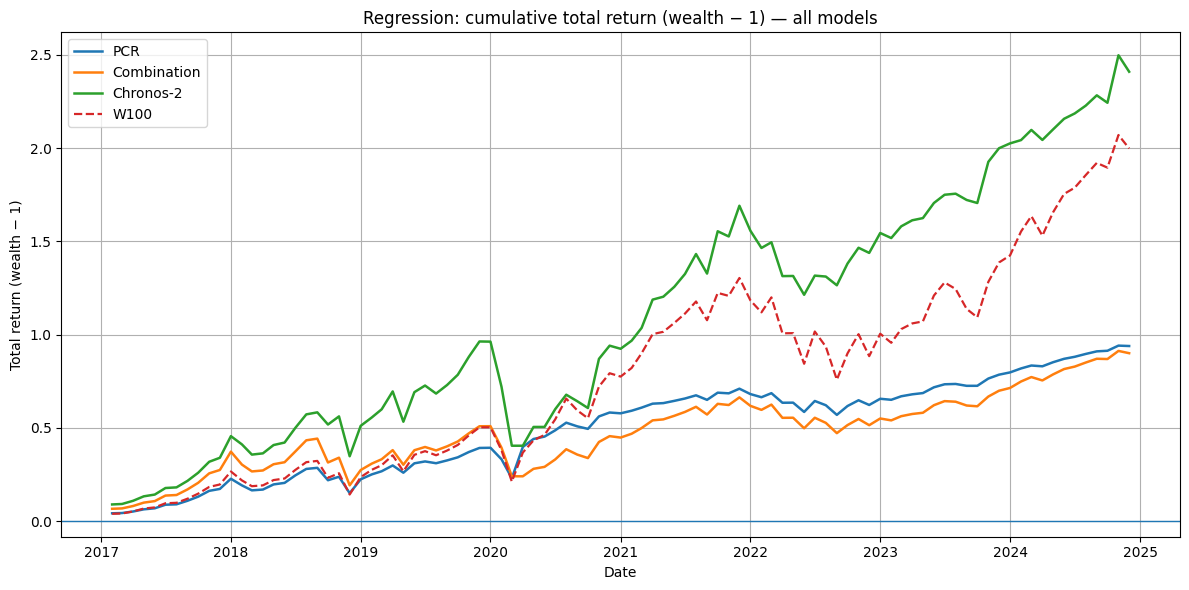

In [32]:
model_pred_cols = {
    "PCR": "y_pred_pcr_without_lookahead_ar_2017",
    "Combination": "y_pred_combination_without_2017",
    "Chronos-2": "y_pred_chronos2_without_lookahead_2017",
    #"TabPFN-2.5": "y_pred_tabpfn_without_lookahead_ar",
}

plot_ts.plot_regression_timing_total_return_models(
    df[df.index >= "1965-01-01"],
    model_pred_cols=model_pred_cols,
    target_col="equity_premium",
    rf_col="Rfree",
    uselog=uselog,
    gamma=5.0,
    vol_window=60,
    baselines=["100"],   # choose any subset
    title="Regression: cumulative total return (wealth − 1) — all models",
)
